### This notebook is about Seattle AirBNB data analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels
import sklearn
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from IPython.display import Image
%matplotlib inline

In [2]:
!ls

Seattle AirBNB Data Analysis.ipynb  listings.csv
calendar.csv                        reviews.csv


##  STEP 0: LOAD THE DATASETS : 

In [3]:
# we load all three datasets including listings, reviews,and calendar.

listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')
calendar= pd.read_csv('calendar.csv')

In [4]:
listings.head(2).T

,0,1
id,241032,953595
listing_url,https://www.airbnb.com/rooms/241032,https://www.airbnb.com/rooms/953595
scrape_id,20160104002432,20160104002432
last_scraped,2016-01-04,2016-01-04
name,Stylish Queen Anne Apartment,Bright & Airy Queen Anne Apartment
summary,NaN,Chemically sensitive? We've removed the irrita...
space,Make your self at home in this charming one-be...,"Beautiful, hypoallergenic apartment in an extr..."
description,Make your self at home in this charming one-be...,Chemically sensitive? We've removed the irrita...
experiences_offered,none,none
neighborhood_overview,NaN,"Queen Anne is a wonderful, truly functional vi..."


In [5]:
reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
calendar.head(6)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN


In [7]:
# we checked the calendar data types and found that we have change some of them like price and date 
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [8]:
reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [9]:
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [10]:
# as can be seen above the datatypes for the data set is not 

In [11]:
# we want to check the null values in the datasets 

missing_data= calendar.isnull().sum()[calendar.isnull().sum() > 0]
missing_data1 = pd.DataFrame(data=missing_data)
missing_data1

,0
price,459028


In [12]:
missing_data= listings.isnull().sum()[listings.isnull().sum() > 0]
missing_data2= pd.DataFrame(data=missing_data)
missing_data2


,0
summary,177
space,569
neighborhood_overview,1032
notes,1606
transit,934
thumbnail_url,320
medium_url,320
xl_picture_url,320
host_name,2
host_since,2


In [13]:
missing_data= reviews.isnull().sum()[reviews.isnull().sum() > 0]
missing_data3= pd.DataFrame(data=missing_data)
missing_data3

,0
comments,18


In [14]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

## STEP 1 : DATA PREPROCESSING 

In [15]:
## there are many features which are necessary for our analysis to we dropped them 

listings = listings.drop([ 'listing_url', 'scrape_id', 'last_scraped',  'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'accommodates',
        'beds', 'bed_type', 'amenities', 'square_feet',
    'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
     
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month'],axis=1)

In [16]:
# we replace the dollar sign here 
calendar['price'] = calendar['price'].str.replace('$','').str.replace(',','');




In [17]:

# change data datatype in calendar to date datatype 
calendar['date'] = pd.to_datetime(calendar['date'])
reviews['date']= pd.to_datetime(reviews['date'])


In [18]:

# change price datatype in calendar to int datatype 
calendar['price']= pd.to_numeric(calendar['price']);


In [19]:
calendar.dtypes


listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

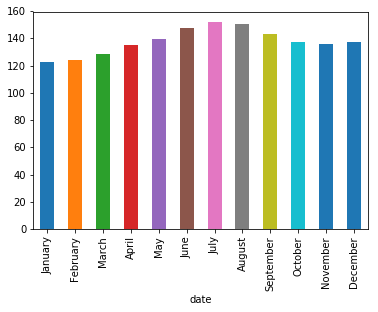

In [20]:

price_mo = calendar.groupby(calendar['date'].dt.strftime('%B'),
                                 sort=False)['price'].mean()

ax= price_mo.plot.bar()


In [21]:
listing_types=listings['property_type'].value_counts()

listings['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

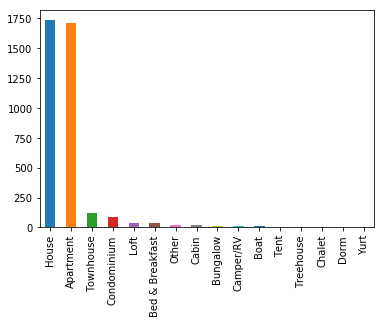

In [22]:
listing_types.plot.bar()

In [23]:
listings.dtypes

id                                int64
name                             object
host_response_time               object
host_listings_count             float64
host_total_listings_count       float64
street                           object
neighbourhood                    object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
city                             object
state                            object
zipcode                          object
property_type                    object
room_type                        object
bathrooms                       float64
bedrooms                        float64
price                            object
weekly_price                     object
monthly_price                    object
first_review                     object
last_review                      object
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64


In [24]:
listings.head(5)

,id,name,host_response_time,host_listings_count,host_total_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,...,price,weekly_price,monthly_price,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication
0,241032,Stylish Queen Anne Apartment,within a few hours,3.0,3.0,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,...,$85.00,NaN,NaN,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0
1,953595,Bright & Airy Queen Anne Apartment,within an hour,6.0,6.0,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,...,$150.00,"$1,000.00","$3,000.00",2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0
2,3308979,New Modern House-Amazing water view,within a few hours,2.0,2.0,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,...,$975.00,NaN,NaN,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0
3,7421966,Queen Anne Chateau,NaN,1.0,1.0,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,...,$100.00,$650.00,"$2,300.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,278830,Charming craftsman 3 bdm house,within an hour,2.0,2.0,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,...,$450.00,NaN,NaN,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0


In [25]:
listings['price'] = listings['price'].str.replace('$','').str.replace(',','');
listings['weekly_price'] = listings['weekly_price'].str.replace('$','').str.replace(',','');
listings['monthly_price'] = listings['monthly_price'].str.replace('$','').str.replace(',','');




listings['price']= pd.to_numeric(listings['price']);
listings['weekly_price']= pd.to_numeric(listings['weekly_price']);
listings['monthly_price']= pd.to_numeric(listings['monthly_price']);


In [26]:
listings.head()

,id,name,host_response_time,host_listings_count,host_total_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,...,price,weekly_price,monthly_price,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication
0,241032,Stylish Queen Anne Apartment,within a few hours,3.0,3.0,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,...,85.0,NaN,NaN,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0
1,953595,Bright & Airy Queen Anne Apartment,within an hour,6.0,6.0,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,...,150.0,1000.0,3000.0,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0
2,3308979,New Modern House-Amazing water view,within a few hours,2.0,2.0,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,...,975.0,NaN,NaN,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0
3,7421966,Queen Anne Chateau,NaN,1.0,1.0,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,...,100.0,650.0,2300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,278830,Charming craftsman 3 bdm house,within an hour,2.0,2.0,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,...,450.0,NaN,NaN,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0


In [27]:

missing_data= listings.isnull().sum()[listings.isnull().sum() > 0]
missing_data1 = pd.DataFrame(data=missing_data)
missing_data1

,0
host_response_time,523
host_listings_count,2
host_total_listings_count,2
neighbourhood,416
zipcode,7
property_type,1
bathrooms,16
bedrooms,6
weekly_price,1809
monthly_price,2301


In [28]:
# we replaced all null values with 0 
listings.monthly_price.fillna(0,inplace=True)
listings =listings.replace(np.nan, 0)

In [29]:

missing_data= listings.isnull().sum()[listings.isnull().sum() > 0]
missing_data1 = pd.DataFrame(data=missing_data)
missing_data1

,0


In [30]:
# we dropped all null values for the neighbourhood which is equal zero
listings.drop(listings.loc[listings['neighbourhood']==0].index, inplace=True)

In [31]:
listings.neighbourhood.value_counts()

Capitol Hill                 351
Ballard                      213
Belltown                     204
Minor                        192
Queen Anne                   187
Fremont                      148
Wallingford                  143
University District          107
First Hill                   105
Stevens                       98
North Beacon Hill             95
Lower Queen Anne              83
Central Business District     81
Greenwood                     79
Columbia City                 61
Ravenna                       59
Phinney Ridge                 56
Magnolia                      55
Green Lake                    52
Atlantic                      50
North Admiral                 48
Mount Baker                   46
Leschi                        44
Maple Leaf                    41
Eastlake                      41
Madrona                       40
Pike Place Market             39
The Junction                  36
Seward Park                   32
Bryant                        32
          

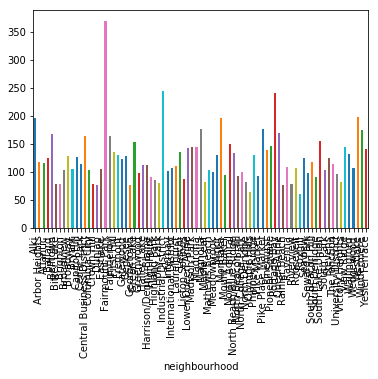

In [32]:
neighbourhood_price = listings.groupby(listings['neighbourhood'])['price'].mean()
neighbourhood_price.plot.bar()



In [40]:
new_listing= listings[['id','name','neighbourhood','city','price']]

In [41]:
new_listing.head()

,id,name,neighbourhood,city,price
0,241032,Stylish Queen Anne Apartment,Queen Anne,Seattle,85.0
1,953595,Bright & Airy Queen Anne Apartment,Queen Anne,Seattle,150.0
2,3308979,New Modern House-Amazing water view,Queen Anne,Seattle,975.0
3,7421966,Queen Anne Chateau,Queen Anne,Seattle,100.0
4,278830,Charming craftsman 3 bdm house,Queen Anne,Seattle,450.0


In [51]:


neighbourhood_counts= new_listing['neighbourhood'].value_counts()

neighourhood_avg_price = new_listing.groupby(new_listing['neighbourhood'])['price'].mean()


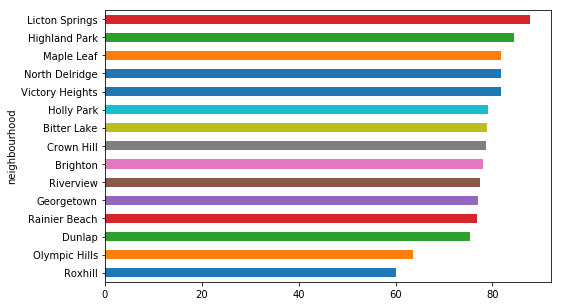

In [63]:
neighourhood_avg_price.sort_values().iloc[0:15].plot(kind = 'barh',figsize = (8,5));

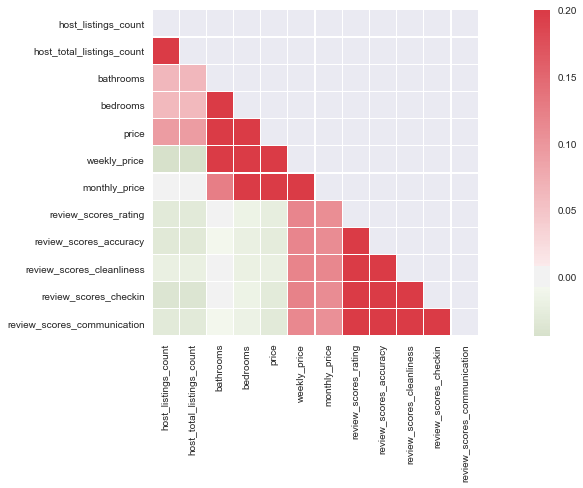

In [83]:

sns.set(style="darkgrid")

corr = listings.drop(columns=['id']).corr()


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(20, 6))

aa = sns.diverging_palette(110, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=aa, vmax=.2, center=0,
            square=True, linewidths=.2);